In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from archivo_principal import cargar_datos

# Cargar y procesar los datos
df = cargar_datos(
    "G:\\Mi unidad\\Carrera de Python\\Curso basico\\Matplotlib\\pokemon_dataset.csv",
    "G:\\Mi unidad\\Carrera de Python\\Curso basico\\Matplotlib\\columnas.json"
)

# Mostrar el DataFrame procesado
df

,pokemon_id,nombre_pokemon,primer_tipo,segundo_tipo,primera_aparicion,generacion,categoria,hp,ataque,defensa,ataque_especial,defensa_especial,velocidad,estadistica_base_total
0,1,bulbasaur,planta,veneno,red/blue,gen 1,regular,45,49,49,65,65,45,318
1,2,ivysaur,planta,veneno,red/blue,gen 1,regular,60,62,63,80,80,60,405
2,3,venusaur,planta,veneno,red/blue,gen 1,regular,80,82,83,100,100,80,525
3,4,charmander,fuego,NaN,red/blue,gen 1,regular,39,52,43,60,50,65,309
4,5,charmeleon,fuego,NaN,red/blue,gen 1,regular,58,64,58,80,65,80,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,raging-bolt,electrico,dragon,scarlet/violet,gen 9,paradoja,125,73,91,137,89,75,590
1021,1022,iron-boulder,roca,psiquico,scarlet/violet,gen 9,regular,90,120,80,68,108,124,590
1022,1023,iron-crown,acero,psiquico,scarlet/violet,gen 9,paradoja,90,72,100,122,108,98,590
1023,1024,terapagos,normal,NaN,scarlet/violet,gen 9,legendario,90,65,85,65,85,60,450


In [2]:
cantidad_tipos = df["primer_tipo"].nunique()
print("En el mundo Pokémon existen {} tipos diferentes".format(cantidad_tipos))

En el mundo Pokémon existen 18 tipos diferentes


Antes de graficar la cantidad de Pokémon's por tipo (primary_type), primero se debe agrupar por alguna variable categorica, por ejemplo, por primer tipo
   primer_tipo  cantidad_pokemons
0         agua                134
1       normal                118
2       planta                103
3        bicho                 83
4        fuego                 66
5     psiquico                 60
6    electrico                 59
7         roca                 58
8    siniestro                 45
9       veneno                 42
10      tierra                 40
11       lucha                 40
12      dragon                 37
13       acero                 36
14    fantasma                 35
15       hielo                 31
16        hada                 29
17     volador                  9
Gráfico de barras


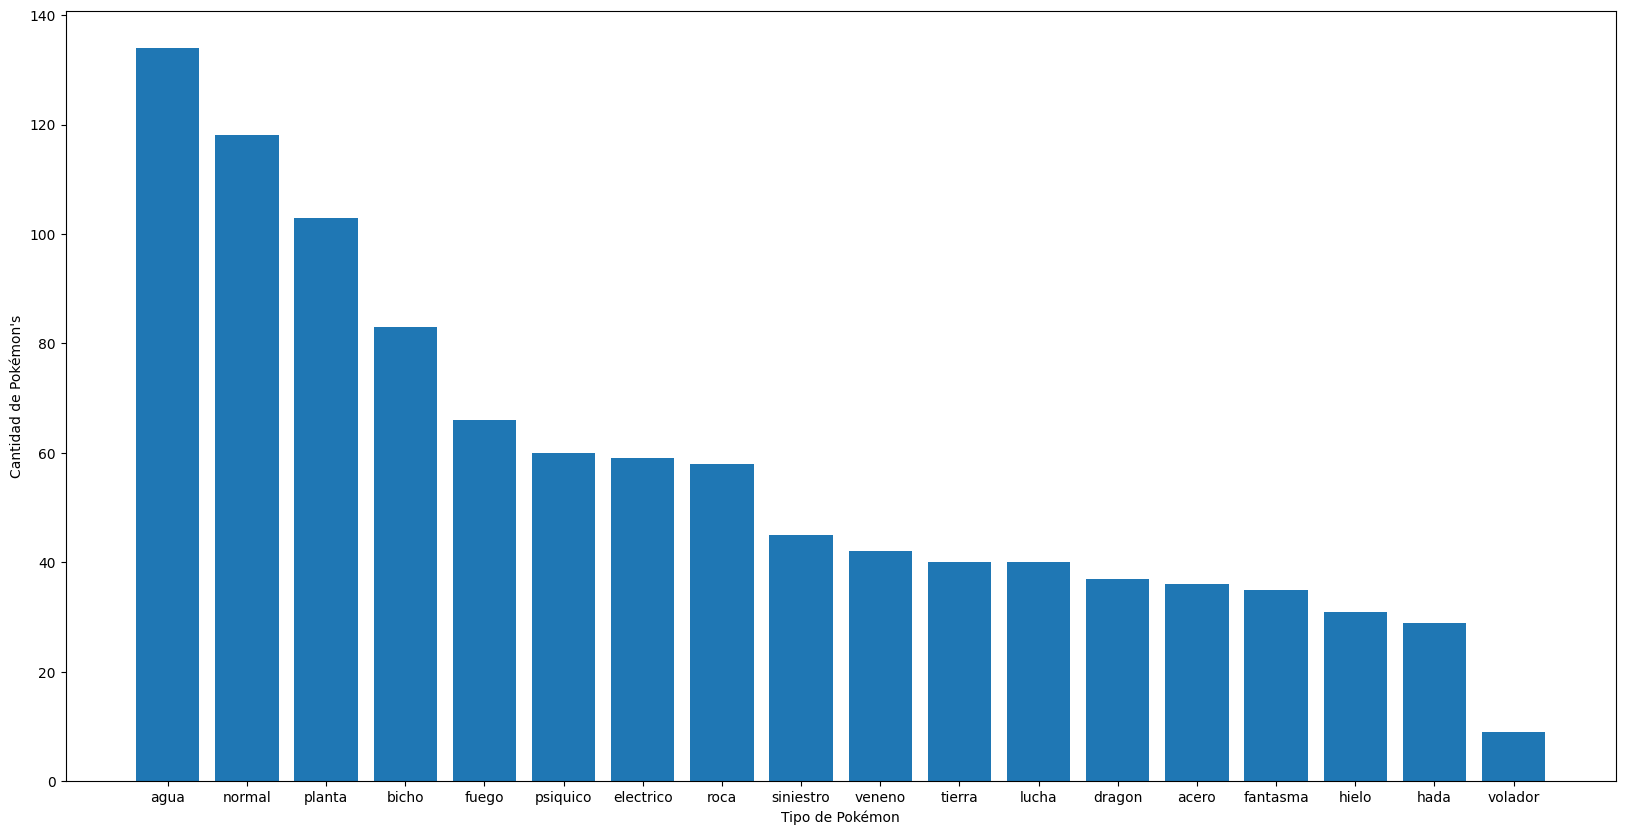

In [3]:
print("Antes de graficar la cantidad de Pokémon's por tipo (primary_type), primero se debe agrupar por alguna variable categorica, por ejemplo, por primer tipo")

pokemon_type = df.groupby("primer_tipo").agg(cantidad_pokemons = ("pokemon_id", "count")).sort_values(by = "cantidad_pokemons", ascending = False).reset_index()
print(pokemon_type)

print("Gráfico de barras")

plt.figure(figsize=(20, 10))
plt.bar(pokemon_type["primer_tipo"], pokemon_type["cantidad_pokemons"])
plt.xlabel("Tipo de Pokémon")
plt.ylabel("Cantidad de Pokémon's")
plt.show()

In [4]:
pokemon_generation = df.groupby(["generacion", "categoria"]).agg(cantidad = ("pokemon_id", "count"), estadistica_promedio = ("estadistica_base_total", "mean")).sort_values(by=["generacion", "cantidad"], ascending=[True, False]).reset_index()
# Redondeando a 2 decimales la variable de estadística total de Pokémon's
pokemon_generation["estadistica_promedio"] = pokemon_generation["estadistica_promedio"].round(2)
print(pokemon_generation)

   generacion    categoria  cantidad  estadistica_promedio
0       gen 1      regular       146                400.92
1       gen 1   legendario         4                605.00
2       gen 1       mitico         1                600.00
3       gen 2      regular        94                393.81
4       gen 2   legendario         5                620.00
5       gen 2       mitico         1                600.00
6       gen 3      regular       125                386.74
7       gen 3   legendario         8                620.00
8       gen 3       mitico         2                600.00
9       gen 4      regular        93                419.85
10      gen 4   legendario         9                625.56
11      gen 4       mitico         5                600.00
12      gen 5      regular       143                409.22
13      gen 5   legendario         9                613.33
14      gen 5       mitico         4                595.00
15      gen 6      regular        66                411.

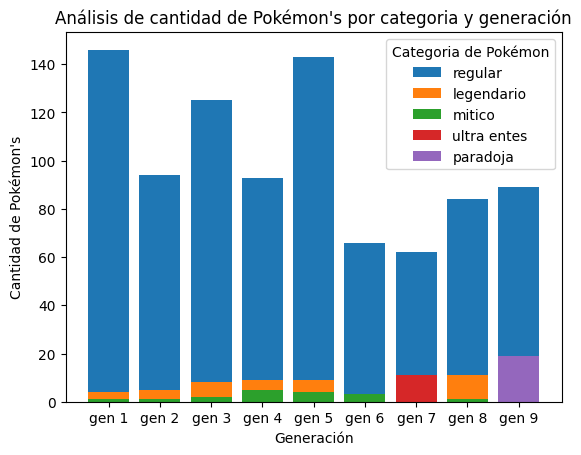

In [5]:
# Asignando las categorias como leyendas

for categoria in pokemon_generation["categoria"].unique():
    subset = pokemon_generation[pokemon_generation["categoria"] ==  categoria]
    plt.bar(subset["generacion"], subset["cantidad"], label = categoria)

# Añadiendo formato al gráfico
plt.title("Análisis de cantidad de Pokémon's por categoria y generación")
plt.xlabel("Generación")
plt.ylabel("Cantidad de Pokémon's")
plt.legend(title="Categoria de Pokémon")
plt.show()

**Replicando gráfico anterior con Seaborn**

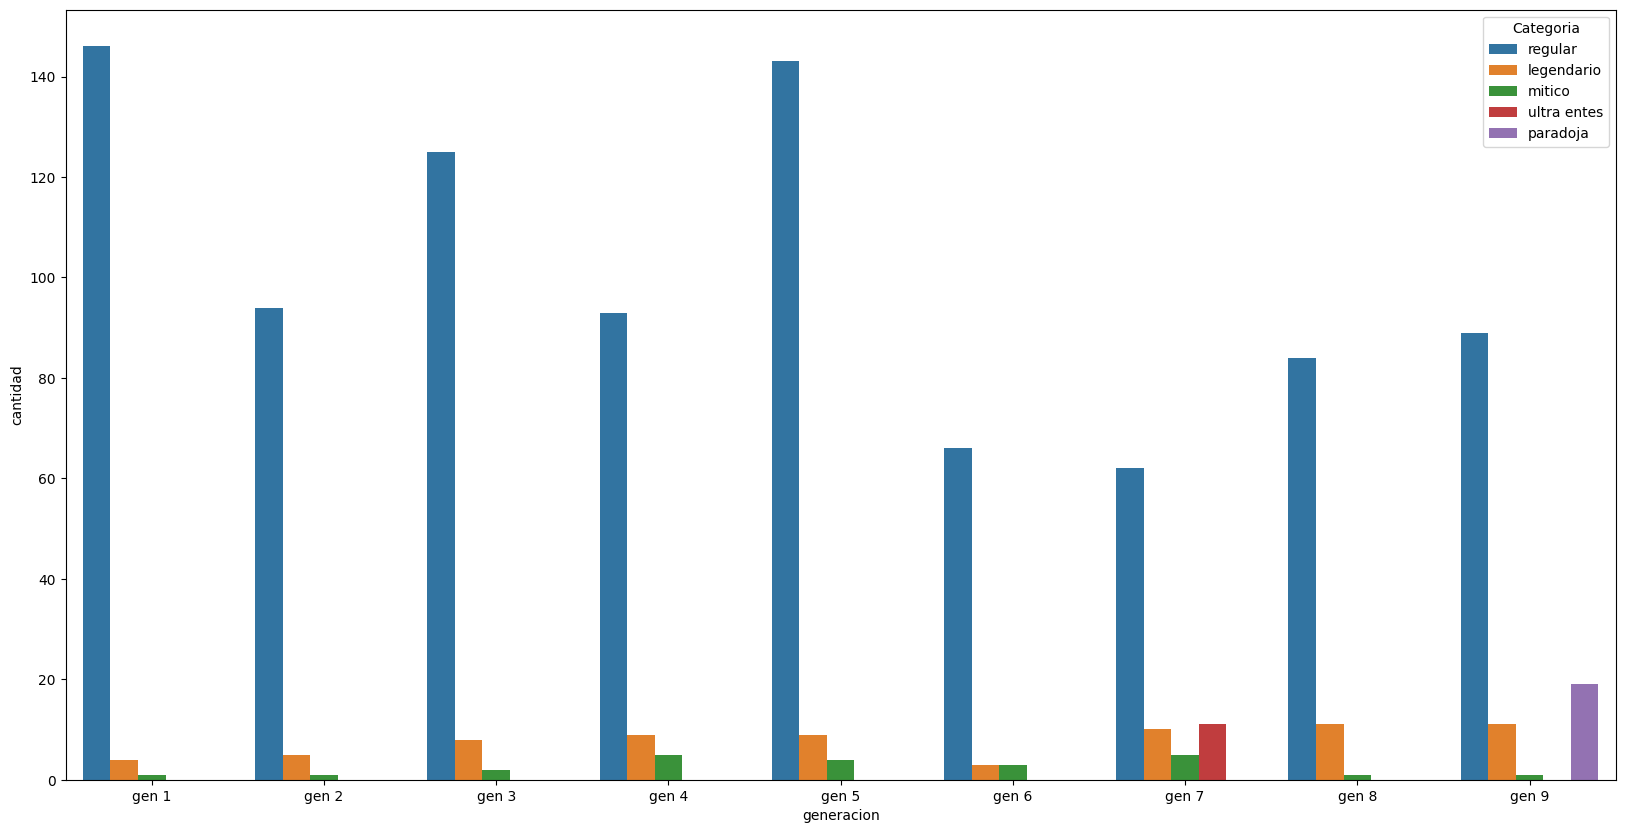

In [6]:
plt.figure(figsize=(20,10))
sns.barplot(data=pokemon_generation, x="generacion", y="cantidad", hue="categoria")
plt.legend(title="Categoria")
plt.show()

C:\Users\rodri\AppData\Local\Temp\ipykernel_16320\422859661.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pokemons_stat = df.groupby("primer_tipo").agg(stat_mean = ("estadistica_base_total", "mean")).sort_values(by="stat_mean", ascending=False).reset_index()


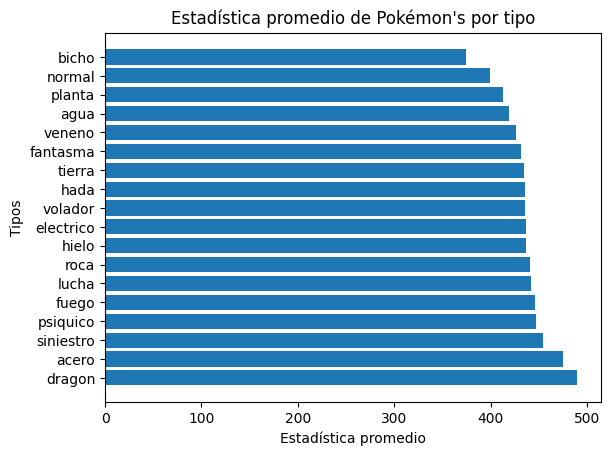

In [8]:
# Estadística total por tipo de Pokémon

pokemons_stat = df.groupby("primer_tipo").agg(stat_mean = ("estadistica_base_total", "mean")).sort_values(by="stat_mean", ascending=False).reset_index()

pokemons_stat["stat_mean"] = pokemons_stat["stat_mean"].round(2)

plt.barh(pokemons_stat["primer_tipo"], pokemons_stat["stat_mean"])
plt.title("Estadística promedio de Pokémon's por tipo")
plt.xlabel("Estadística promedio")
plt.ylabel("Tipos")
plt.show()

In [19]:
gen5 = df[df["generacion"] == "gen 9"]
gen5.head(9)

,pokemon_id,nombre_pokemon,primer_tipo,segundo_tipo,primera_aparicion,generacion,categoria,hp,ataque,defensa,ataque_especial,defensa_especial,velocidad,estadistica_base_total
905,906,sprigatito,planta,NaN,scarlet/violet,gen 9,regular,40,61,54,45,45,65,310
906,907,floragato,planta,NaN,scarlet/violet,gen 9,regular,61,80,63,60,63,83,410
907,908,meowscarada,planta,siniestro,scarlet/violet,gen 9,regular,76,110,70,81,70,123,530
908,909,fuecoco,fuego,NaN,scarlet/violet,gen 9,regular,67,45,59,63,40,36,310
909,910,crocalor,fuego,NaN,scarlet/violet,gen 9,regular,81,55,78,90,58,49,411
910,911,skeledirge,fuego,fantasma,scarlet/violet,gen 9,regular,104,75,100,110,75,66,530
911,912,quaxly,agua,NaN,scarlet/violet,gen 9,regular,55,65,45,50,45,50,310
912,913,quaxwell,agua,NaN,scarlet/violet,gen 9,regular,70,85,65,65,60,65,410
913,914,quaquaval,agua,lucha,scarlet/violet,gen 9,regular,85,120,80,85,75,85,530


In [26]:
# Obteniendo los Pokémon's iniciales por generación
def iniciales():
    generacion1 = df[(df["generacion"] == "gen 1") & (df["pokemon_id"] <= 9)]
    generacion2 = df[(df["generacion"] == "gen 2") & (df["pokemon_id"].between(152, 160))]
    generacion3 = df[(df["generacion"] == "gen 3") & (df["pokemon_id"].between(252, 260))]
    generacion4 = df[(df["generacion"] == "gen 4") & (df["pokemon_id"].between(387, 395))]
    generacion5 = df[(df["generacion"] == "gen 5") & (df["pokemon_id"].between(495, 503))]
    generacion6 = df[(df["generacion"] == "gen 6") & (df["pokemon_id"].between(650, 658))]
    generacion7 = df[(df["generacion"] == "gen 7") & (df["pokemon_id"].between(722, 730))]
    generacion8 = df[(df["generacion"] == "gen 8") & (df["pokemon_id"].between(810, 818))]
    generacion9 = df[(df["generacion"] == "gen 9") & (df["pokemon_id"].between(906, 914))]

    # Se seleccionan algunas columnas
    columnas = ["pokemon_id", "nombre_pokemon", "primer_tipo", "segundo_tipo", "generacion", "hp", "ataque", "defensa", "ataque_especial", "defensa_especial", "velocidad", "estadistica_base_total"]

    # Se unen todos los dataframes
    pokemons_iniciales = pd.concat([generacion1, generacion2, generacion3, generacion4, generacion5, generacion6, generacion7, generacion8, generacion9])

    # Imprimiendo el resultado
    return pokemons_iniciales[columnas]

inicialespokemon = iniciales()
inicialespokemon

,pokemon_id,nombre_pokemon,primer_tipo,segundo_tipo,generacion,hp,ataque,defensa,ataque_especial,defensa_especial,velocidad,estadistica_base_total
0,1,bulbasaur,planta,veneno,gen 1,45,49,49,65,65,45,318
1,2,ivysaur,planta,veneno,gen 1,60,62,63,80,80,60,405
2,3,venusaur,planta,veneno,gen 1,80,82,83,100,100,80,525
3,4,charmander,fuego,NaN,gen 1,39,52,43,60,50,65,309
4,5,charmeleon,fuego,NaN,gen 1,58,64,58,80,65,80,405
...,...,...,...,...,...,...,...,...,...,...,...,...
909,910,crocalor,fuego,NaN,gen 9,81,55,78,90,58,49,411
910,911,skeledirge,fuego,fantasma,gen 9,104,75,100,110,75,66,530
911,912,quaxly,agua,NaN,gen 9,55,65,45,50,45,50,310
912,913,quaxwell,agua,NaN,gen 9,70,85,65,65,60,65,410


In [27]:
# Exportando datos de iniciales a CSV
data_pokemons_iniciales = inicialespokemon.to_csv("G:\\Mi unidad\\Carrera de Python\\Curso basico\\Matplotlib\\data_pokemons_iniciales.csv", index=False)

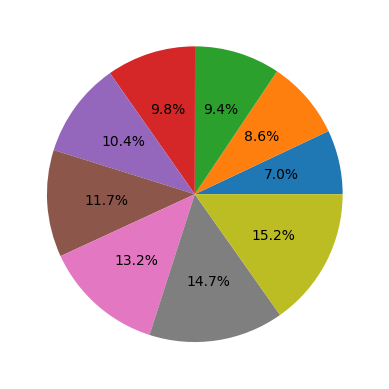

In [28]:
pokemon_generation_quantity = df.groupby("generacion").agg(cantidad = ("pokemon_id", "count")).sort_values(by="cantidad").reset_index()

# Gráfico de dona o pie
plt.pie(pokemon_generation_quantity["cantidad"], autopct='%1.1f%%')
plt.show()

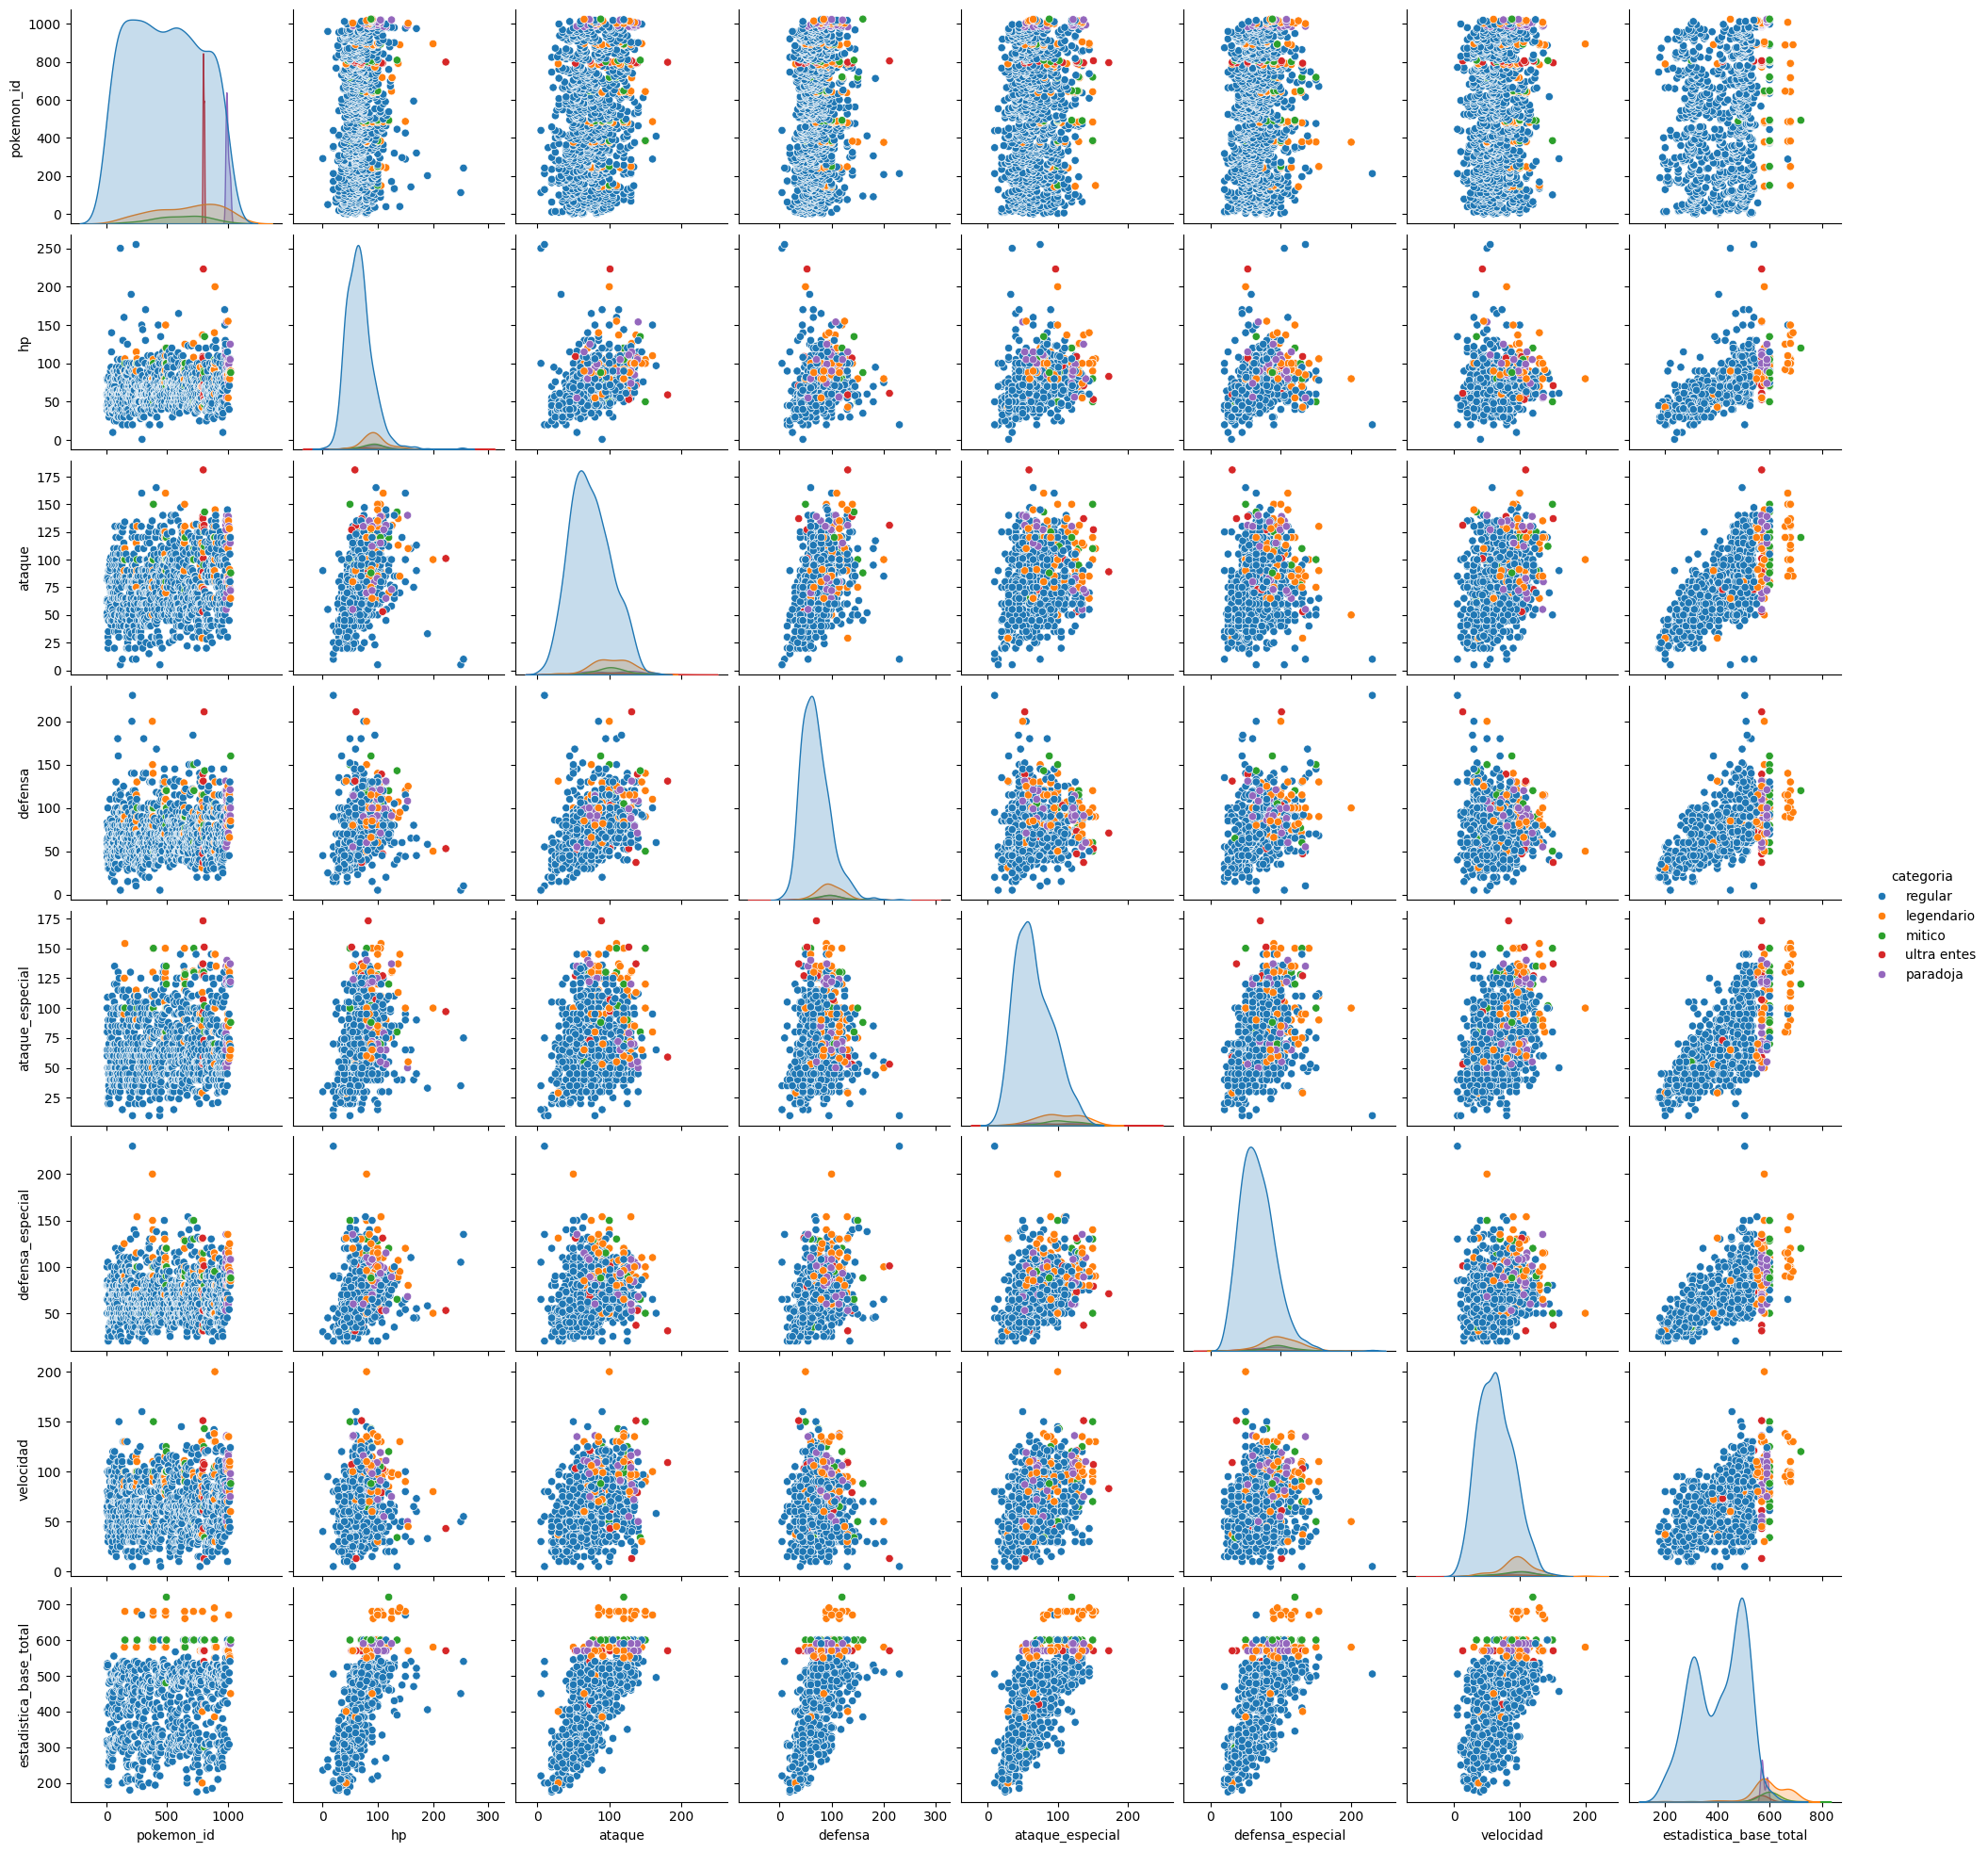

In [29]:
sns.pairplot(df, hue="categoria")